## Setting the environment

In [1]:
# Importing essential libraries and functions
import pandas as pd
import numpy as np
import nltk
import re

nltk.download("stopwords")
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Visualisation Library
import matplotlib.pyplot as plt

# Feature Transformation Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Classification Report and model evaluation
from sklearn.metrics import roc_auc_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading dataset

In [2]:
angry=pd.read_csv(r'C:\Users\Vishal\Documents\capstone project nlp\angriness.csv')
happy=pd.read_csv(r'C:\Users\Vishal\Documents\capstone project nlp\happiness.csv')
sad=pd.read_csv(r'C:\Users\Vishal\Documents\capstone project nlp\sadness.csv')

In [3]:
feelings=pd.concat([angry, happy, sad], axis=0) 
feelings

,content,intensity
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angriness
1,Not available for busy people☺,angriness
2,I do not exist to impress the world. I exist t...,angriness
3,Everything is getting expensive except some pe...,angriness
4,My phone screen is brighter than my future 🙁,angriness
...,...,...
630,Stop crying over yesterday and start smiling f...,sadness
631,An Eye with Dust ‘n A Heart with Trust Always ...,sadness
632,Tears come from the heart and not from the brain.,sadness
633,"Sometimes you have to hold your head up high, ...",sadness


In [4]:
label_mapping = {'happiness': 1, 'angriness': 0, 'sadness': 2}
feelings['intensity']=feelings['intensity'].map(label_mapping)

In [5]:
feelings.head(2000)

,content,intensity
0,"Sometimes I’m not angry, I’m hurt and there’s ...",0
1,Not available for busy people☺,0
2,I do not exist to impress the world. I exist t...,0
3,Everything is getting expensive except some pe...,0
4,My phone screen is brighter than my future 🙁,0
...,...,...
591,"['You Hurt Me But I Still Love You.', 'True Lo...",2
592,"['You Hurt Me But I Still Love You.', 'True Lo...",2
593,"['You Hurt Me But I Still Love You.', 'True Lo...",2
594,"['You Hurt Me But I Still Love You.', 'True Lo...",2


In [6]:

feelings.sample(10)

,content,intensity
269,I Am Who I Am. Your Approval Is Not Needed.,0
116,The smile on my face doesn't mean my life is p...,2
329,The best route of awareness is a realization o...,1
185,Every day we are given is a gift and we should...,1
357,"Angry? Take a deep breath before you speak, be...",0
694,Telling someone to calm down just makes them s...,0
264,I need you so much closer.,2
398,Just because we are not close anymore doesn’t ...,2
580,It’s better to cry than to be angry because an...,0
27,One wise guy invented Whatsapp… and his wife a...,1


In [7]:
feelings['content'][1]

1                       Not available for busy people☺
1    Love is a long sweet dream & marriage is an al...
1    Don’t expect me to tell you what you did wrong...
Name: content, dtype: object

In [8]:
feelings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2039 entries, 0 to 634
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2039 non-null   object
 1   intensity  2039 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.3+ KB


## Data Preprocessing

In [9]:
feelings.isna().sum()

content      0
intensity    0
dtype: int64

In [10]:
feelings.shape

(2039, 2)

In [11]:
feelings['intensity'].value_counts()

intensity
1    708
0    696
2    635
Name: count, dtype: int64

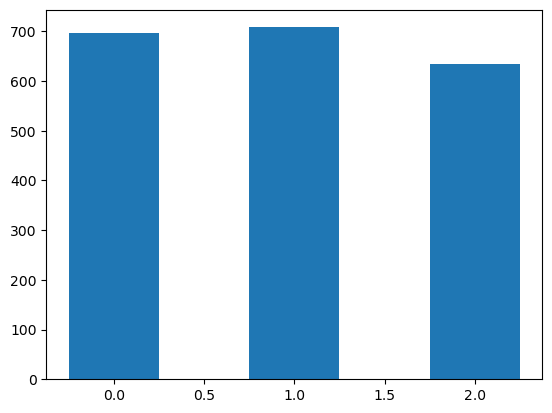

In [12]:
# Let's observe distribution of data
label_dis=feelings['intensity'].value_counts().to_dict()
ax=plt.bar(label_dis.keys(), label_dis.values(), width=0.5)

In [13]:
#Duplicates in dataset
len(feelings['content'])==len(feelings['content'].drop_duplicates())

False

In [14]:
len(feelings['content'])

2039

In [15]:
#checking the length of content column
feelings['length_of_ content']= feelings['content'].apply(lambda x: len(x.split(" ")))

feelings

,content,intensity,length_of_ content
0,"Sometimes I’m not angry, I’m hurt and there’s ...",0,11
1,Not available for busy people☺,0,5
2,I do not exist to impress the world. I exist t...,0,22
3,Everything is getting expensive except some pe...,0,11
4,My phone screen is brighter than my future 🙁,0,9
...,...,...,...
630,Stop crying over yesterday and start smiling f...,2,9
631,An Eye with Dust ‘n A Heart with Trust Always ...,2,11
632,Tears come from the heart and not from the brain.,2,10
633,"Sometimes you have to hold your head up high, ...",2,16


In [16]:
print("Subset on intensity for label 0",round(feelings[feelings['intensity']==0]['length_of_ content'].mean()))
print("Subset on intensity for label 1",round(feelings[feelings['intensity']==1]['length_of_ content'].mean()))
print("Subset on intensity for label 2",round(feelings[feelings['intensity']==2]['length_of_ content'].mean()))

Subset on intensity for label 0 228
Subset on intensity for label 1 13
Subset on intensity for label 2 468


In [17]:
def remove_stopwords(content):
    # Tokenize the sentence into words
    words = word_tokenize(content)
    
    # Remove stopwords
    
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    
    # Join the filtered words back into a sentence
    filtered_content = ' '.join(filtered_words)
    
    return filtered_content

In [18]:
# Calling remove_stopwords function 
feelings['new1']=feelings['content'].apply(remove_stopwords)


In [19]:
feelings.head()

,content,intensity,length_of_ content,new1
0,"Sometimes I’m not angry, I’m hurt and there’s ...",0,11,"Sometimes ’ angry , ’ hurt ’ big difference ."
1,Not available for busy people☺,0,5,available busy people☺
2,I do not exist to impress the world. I exist t...,0,22,exist impress world . exist live life way make...
3,Everything is getting expensive except some pe...,0,11,"Everything getting expensive except people , g..."
4,My phone screen is brighter than my future 🙁,0,9,phone screen brighter future 🙁


In [20]:
def text_clean(content):
    #lower case
    content=content.lower()
    #remove punctuation
    content=re.sub('[()!?]',' ' ,content)
    content= re.sub('\[.''-*?\]',' ', content)
    content= re.sub(r'\[|\]',' ', content)
    content = re.sub(r'\s+', ' ', content)
    #Alphanumeric
    content= re.sub("@[a-z0-9]",' ', content)
    content= re.sub("#[a-z0-9_]",' ', content)
    content= re.sub(r"https\S+",' ', content)
    content= re.sub(r"www.\S+",' ', content)
    return content

In [21]:
#calling text_clean function
feelings['clean_content']=feelings['new1'].apply(text_clean)

feelings.head()

,content,intensity,length_of_ content,new1,clean_content
0,"Sometimes I’m not angry, I’m hurt and there’s ...",0,11,"Sometimes ’ angry , ’ hurt ’ big difference .","sometimes ’ angry , ’ hurt ’ big difference ."
1,Not available for busy people☺,0,5,available busy people☺,available busy people☺
2,I do not exist to impress the world. I exist t...,0,22,exist impress world . exist live life way make...,exist impress world . exist live life way make...
3,Everything is getting expensive except some pe...,0,11,"Everything getting expensive except people , g...","everything getting expensive except people , g..."
4,My phone screen is brighter than my future 🙁,0,9,phone screen brighter future 🙁,phone screen brighter future 🙁


In [22]:
feelings['new_length']= feelings['clean_content'].apply(lambda x: len(x.split(" ")))

In [23]:
print("Subset on intensity for label 0",round(feelings[feelings['intensity']==0]['new_length'].mean()))
print("Subset on intensity for label 1",round(feelings[feelings['intensity']==1]['new_length'].mean()))
print("Subset on intensity for label 2",round(feelings[feelings['intensity']==2]['new_length'].mean()))

Subset on intensity for label 0 184
Subset on intensity for label 1 9
Subset on intensity for label 2 371


In [24]:
feelings.sample(10)

,content,intensity,length_of_ content,new1,clean_content,new_length
327,Happiness is a soul journey.,1,5,Happiness soul journey .,happiness soul journey .,4
463,Sometimes love is like a cactus. The tighter y...,1,17,Sometimes love like cactus . tighter try hold ...,sometimes love like cactus . tighter try hold ...,11
26,"I take words very seriously, and it breaks my ...",2,22,"take words seriously , breaks heart find peopl...","take words seriously , breaks heart find peopl...",13
618,Don’t waste your tears crying over someone who...,2,15,’ waste tears crying someone ’ even deserve se...,’ waste tears crying someone ’ even deserve se...,11
507,In life I need only you!,1,6,life need !,life need,3
409,"Some days I cant stop thinking about you, and ...",2,19,"days cant stop thinking , days wonder wasting ...","days cant stop thinking , days wonder wasting ...",10
6,"204 countries, 805 Islands, 7 seas, 7+ Billion...",1,13,"204 countries , 805 Islands , 7 seas , 7+ Bill...","204 countries , 805 islands , 7 seas , 7+ bill...",16
554,Don’t play with someone’s heart if you have no...,1,15,’ play someone ’ heart intention SERIOUS RELAT...,’ play someone ’ heart intention serious relat...,9
370,The first step to success is refusing to be a ...,1,19,first step success refusing prisoner environme...,first step success refusing prisoner environme...,8
598,Love never dies...only the lover changes.,1,6,Love never dies ... lover changes .,love never dies ... lover changes .,7


## Dividing dataset into training and test set

In [25]:
X_train, X_test, y_train, y_test= train_test_split(feelings['clean_content'], feelings['intensity'], test_size=0.3)#, stratify= feelings['intensity'])

In [26]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (1427,)
Shape of X_test: (612,)


In [27]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


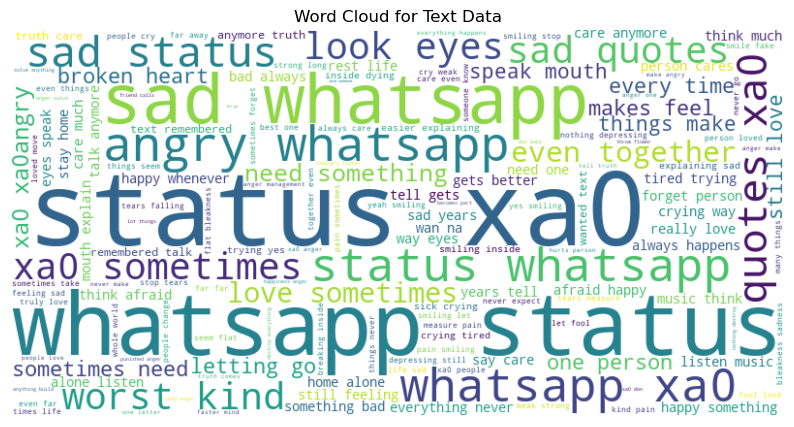

In [28]:
from wordcloud import WordCloud

text_data_combined = ' '.join(X_train)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text_data_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Data')
plt.show()

## Model fitting 

In [29]:
#using Count vectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

modelclasses = [
    ["Logistic_Regression", LogisticRegression],
    ["NaiveBayes", MultinomialNB],
    ["RandomForest", RandomForestClassifier]
]

results = []

for modelname, Model in modelclasses:
    model = Model()
    model.fit(X_train_vec, y_train)  # Ensure that y_train is an array of integers
    y_score = model.predict_proba(X_test_vec)
    auc = np.round(roc_auc_score(y_test, y_score, multi_class='ovr'), 2)
    score = np.round(model.score(X_test_vec, y_test), 2)
    results.append({'modelname': modelname, 'test_score': score, 'auc': auc})

results_df = pd.DataFrame(results)


In [30]:
results_df

,modelname,test_score,auc
0,Logistic_Regression,0.74,0.90
1,NaiveBayes,0.62,0.81
2,RandomForest,0.77,0.91


In [31]:
#using TFIDF vectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

modelclasses = [
    ["Logistic_Regression", LogisticRegression],
    ["NaiveBayes", MultinomialNB],
    ["RandomForest", RandomForestClassifier]
]

results = []

for modelname, Model in modelclasses:
    model = Model()
    model.fit(X_train_tf, y_train)  # Ensure that y_train is an array of integers
    y_score = model.predict_proba(X_test_tf)
    y_pred = model.predict(X_test_tf)
    class_report = classification_report(y_test, y_pred)
    auc = np.round(roc_auc_score(y_test, y_score, multi_class='ovr'), 2)
    training_score=np.round(model.score(X_train_tf, y_train),2)  
    testing_score = np.round(model.score(X_test_tf, y_test), 2)
    results.append({'modelname': modelname, 'auc1': auc, 'accuracy': testing_score})

results_df1 = pd.DataFrame(results)


In [32]:
results_df1

,modelname,auc1,accuracy
0,Logistic_Regression,0.91,0.75
1,NaiveBayes,0.88,0.70
2,RandomForest,0.91,0.76


## Model performance

In [33]:
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       199
           1       0.71      0.78      0.75       221
           2       0.80      0.75      0.77       192

    accuracy                           0.76       612
   macro avg       0.76      0.76      0.76       612
weighted avg       0.76      0.76      0.76       612



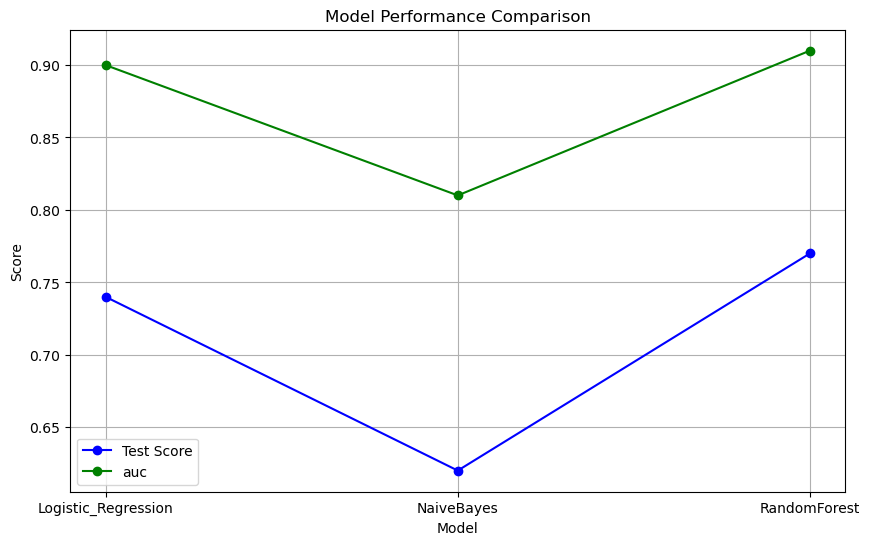

In [34]:
# Model Performance Charts(TFIDFvectorizer)
model_names = results_df['modelname']
test_scores = results_df['test_score']
auc = results_df['auc']

plt.figure(figsize=(10, 6))

# Line chart for test scores
plt.plot(model_names, test_scores, marker='o', label='Test Score', linestyle='-', color='blue')

# Line chart for accuracy scores
plt.plot(model_names, auc, marker='o', label='auc', linestyle='-', color='green')

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

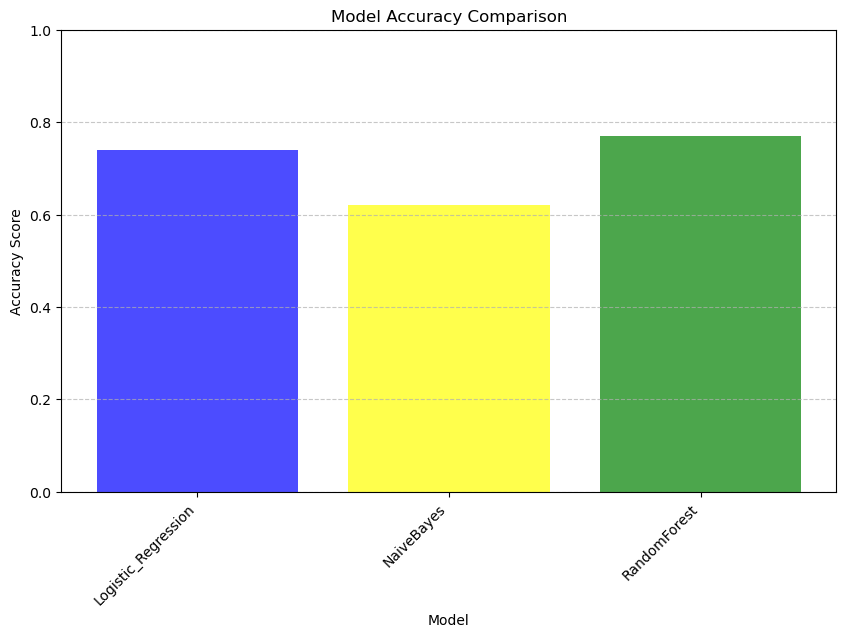

In [35]:
# Model Performance Charts(Countvectorizer)

model_names = results_df['modelname']
accuracy_scores = results_df['test_score']
auc = results_df['auc']

# Plotting a bar chart for accuracy scores
plt.figure(figsize=(10, 6))

plt.bar(model_names, accuracy_scores, color=['blue','yellow','green'], alpha=0.7)

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

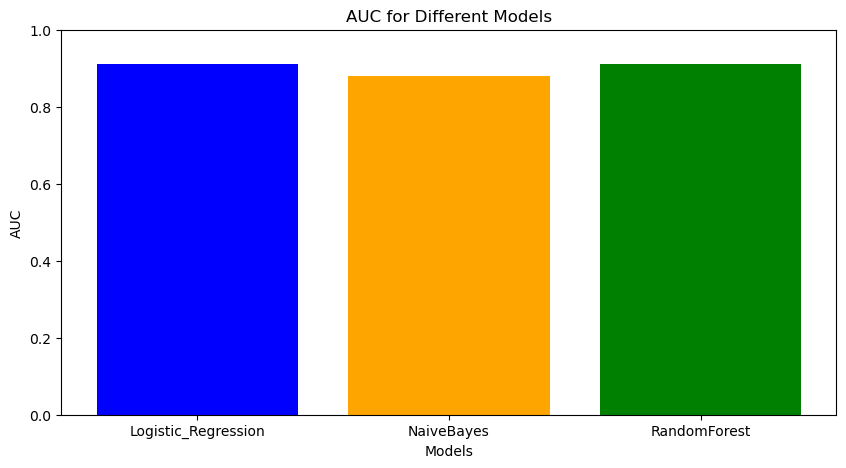

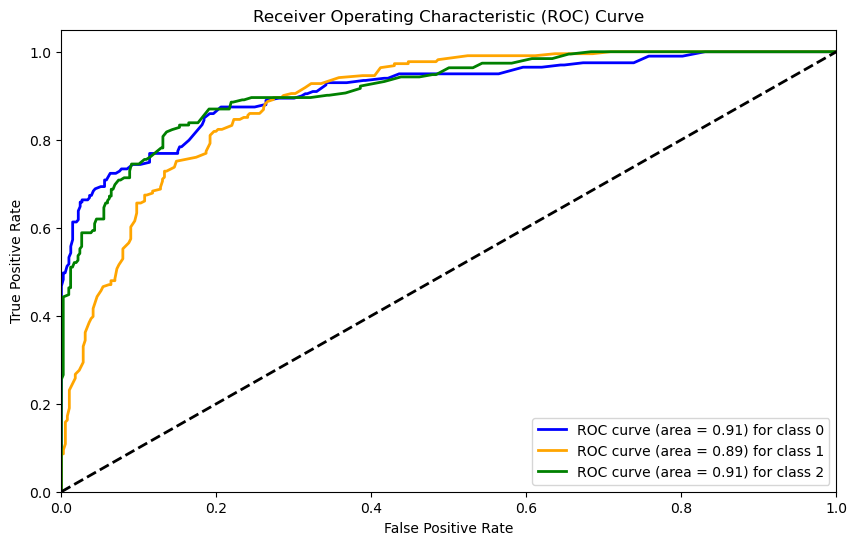

In [36]:
# for TFIDF vectorizer

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Bar plot for AUC
plt.figure(figsize=(10, 5))
plt.bar(results_df1['modelname'], results_df1['auc1'], color=['blue', 'orange', 'green'])
plt.title('AUC for Different Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.ylim(0, 1)
plt.show()

# ROC Curve
plt.figure(figsize=(10, 6))

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['blue', 'orange', 'green'])
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


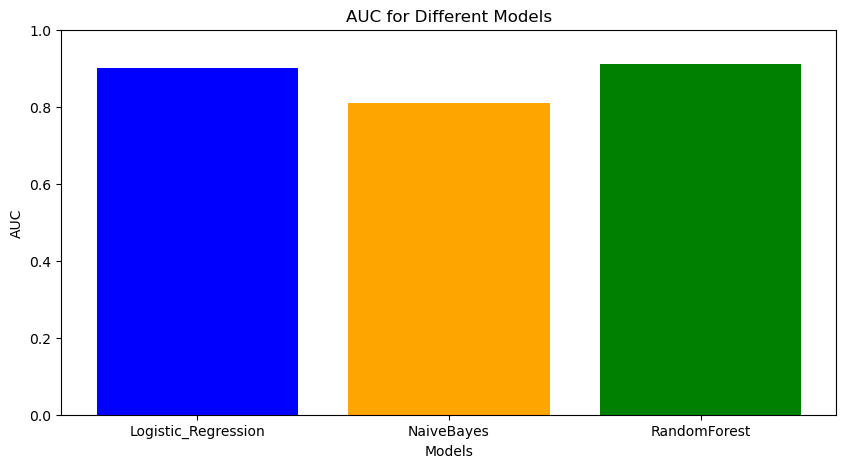

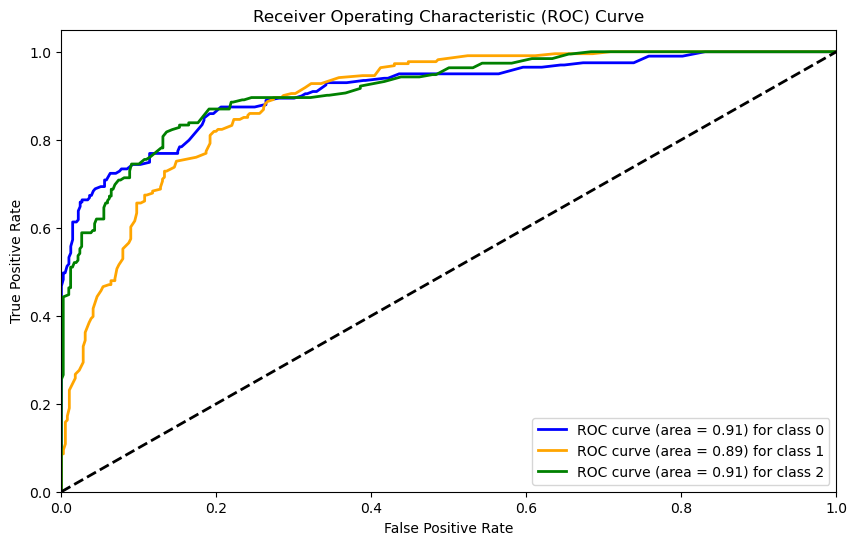

In [37]:
# for Countvectorizer

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Bar plot for AUC
plt.figure(figsize=(10, 5))
plt.bar(results_df['modelname'], results_df['auc'], color=['blue', 'orange', 'green'])
plt.title('AUC for Different Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.ylim(0, 1)
plt.show()

# ROC Curve
plt.figure(figsize=(10, 6))

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['blue', 'orange', 'green'])
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Making Predictions

In [ ]:
# Testing the model
def test_model_with_user_input(model, vectorizer):
    
    # Get user input
    user_input = input("Enter a text for classification: ")

    # Vectorizing the user input using the  Countvectorizer 
    user_input_vectorized = vectorizer.transform([user_input])

    # Make predictions using the trained model
    prediction = model.predict(user_input_vectorized)

    return prediction[0]

# Example usage:
predicted_class = test_model_with_user_input(model, vectorizer)

print(f"\nPredicted class: {predicted_class}")
